# CIFAR Conv Net

И так, в этом ноутбуке Вы сделаете превую в своей жизни сверточную сеть! На сложном датасете. Cкачайте его кстати, 

In [ ]:
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from cifar import load_CIFAR10
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = 'cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

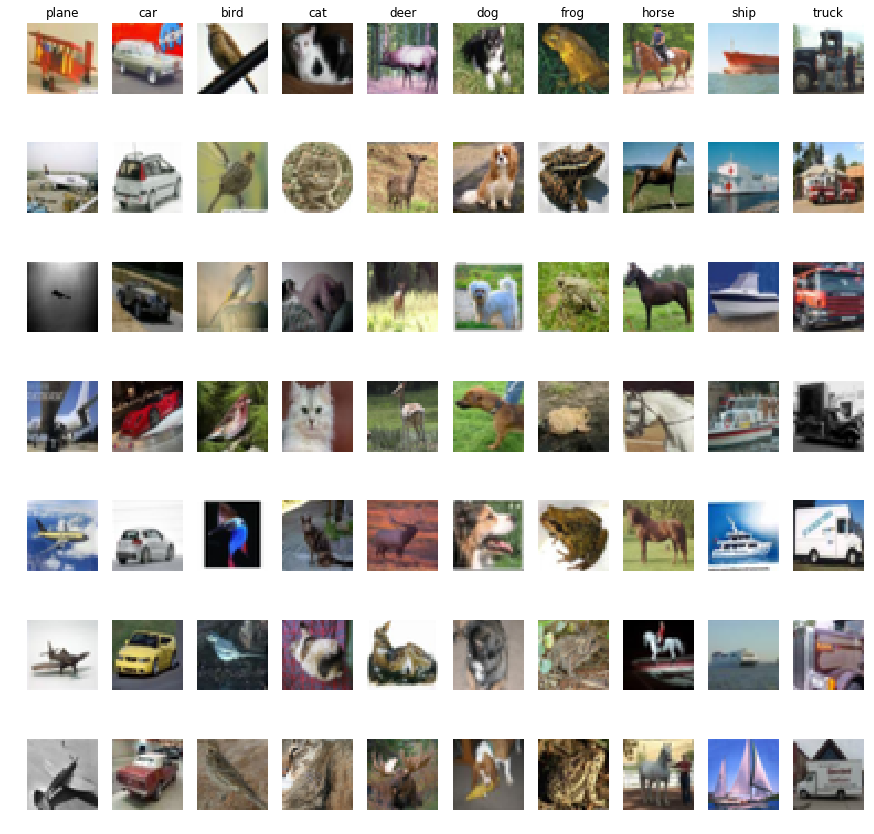

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
plt.figure(figsize=(15, 15))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

<h1 align="center">First of all -- Checking Questions</h1> 

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

<Ответ>

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

<Ответ>


**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

<Ответ>

**Вопрос 4**: Как сделать стайл трансфер для музыки? oO

<Ответ>

In [4]:
import lasagne
from theano import tensor as T
from lasagne.nonlinearities import *

input_X = T.tensor4("X")
target_y = T.vector("target Y integer",dtype='int32')

Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
/tmp/try_flags_dlpRVK.c:4:19: fatal error: cudnn.h: Нет такого файла или каталога
compilation terminated.

Mapped name None to device cuda: GeForce 840M (0000:03:00.0)


### Соберите нейронку: 
- Many times x (Conv+Pool)
- Many small convolutions like 3x3
- Batch Norm 
- Residual Connection
- Data Augmentation 
- Learning rate Schedule 
- ...

### Для вдохновения 
- http://torch.ch/blog/2015/07/30/cifar.html
- https://github.com/szagoruyko/wide-residual-networks 

### Самое интересное
- Для сдачи задания нужно набрать на точность тесте > **92.5**% (это займет много времени, торопитесь :) )
- Для получения бонусных баллов > **95.0**%
- Будет очень хорошо если вы придумаете свою архитектуру или сможете обучить что-то из вышеперечисленного :)
- А для обучения всего этого добра вам будет куда удобнее использовать GPU на Amazon 
    - Инструкция https://github.com/persiyanov/ml-mipt/tree/master/amazon-howto 
    - Вам помогут tmux, CuDNN, ssh tunnel, nvidia-smi, ... 
    - Have fun :)

In [5]:

from lasagne.layers import Conv2DLayer as ConvLayer
#from lasagne.layers.dnn import Conv2DDNNLayer as ConvLayer
from lasagne.layers import ElemwiseSumLayer
from lasagne.layers import InputLayer
from lasagne.layers import DenseLayer
from lasagne.layers import GlobalPoolLayer
from lasagne.layers import PadLayer
from lasagne.layers import ExpressionLayer
from lasagne.layers import NonlinearityLayer
from lasagne.nonlinearities import softmax, rectify
from lasagne.layers import batch_norm

In [12]:
net = lasagne.layers.InputLayer(shape=(None, 3, 32, 32), input_var=input_X)

net = lasagne.layers.Conv2DLayer(net, 64, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.Conv2DLayer(net, 64, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.MaxPool2DLayer(net, (2,2))

net = lasagne.layers.Conv2DLayer(net, 128, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.Conv2DLayer(net, 128, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.MaxPool2DLayer(net, (2,2))

net = lasagne.layers.Conv2DLayer(net, 256, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.Conv2DLayer(net, 256, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.Conv2DLayer(net, 256, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.MaxPool2DLayer(net, (2,2))

net = lasagne.layers.Conv2DLayer(net, 512, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.Conv2DLayer(net, 512, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.Conv2DLayer(net, 512, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.Conv2DLayer(net, 512, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.MaxPool2DLayer(net, (2,2))

net = lasagne.layers.Conv2DLayer(net, 512, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.Conv2DLayer(net, 512, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.Conv2DLayer(net, 512, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.Conv2DLayer(net, 512, (3,3), nonlinearity=rectify, pad='same')
net = lasagne.layers.MaxPool2DLayer(net, (2,2))

net = lasagne.layers.DenseLayer(lasagne.layers.dropout(net, p=0.5), num_units=4096)
net = lasagne.layers.DenseLayer(lasagne.layers.dropout(net, p=0.5), num_units=4096)
net = lasagne.layers.DenseLayer(lasagne.layers.dropout(net, p=0.5), num_units=1000)

net = lasagne.layers.DenseLayer(net,num_units = 10, nonlinearity=softmax)

In [13]:
y_predicted = lasagne.layers.get_output(net)
all_weights = lasagne.layers.get_all_params(net)
print all_weights

[W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b, W, b]


In [14]:
loss = lasagne.objectives.categorical_crossentropy(y_predicted,target_y).mean()
accuracy = lasagne.objectives.categorical_accuracy(y_predicted,target_y).mean()
updates = lasagne.updates.adam(loss, all_weights)

In [15]:
train_fun = theano.function([input_X,target_y],[loss, accuracy], updates=updates)
accuracy_fun = theano.function([input_X,target_y],accuracy)

### Вот и всё, пошли её учить

In [ ]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

# Процесс обучения

In [ ]:
import time

num_epochs = 10 #количество проходов по данным

batch_size = 50 #размер мини-батча

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_acc = 0
    train_batches = 0
    start_time = time.time()
    for batch in iterate_minibatches(X_train, y_train,batch_size):
        inputs, targets = batch
        train_err_batch, train_acc_batch= train_fun(inputs, targets)
        train_err += train_err_batch
        train_acc += train_acc_batch
        train_batches += 1

    # And a full pass over the validation data:
    val_acc = 0
    val_batches = 0
    for batch in iterate_minibatches(X_val, y_val, batch_size):
        inputs, targets = batch
        val_acc += accuracy_fun(inputs, targets)
        val_batches += 1

    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
    print("  training loss (in-iteration):\t\t{:.6f}".format(train_err / train_batches))
    print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
    print("  validation accuracy:\t\t{:.2f} %".format(val_acc / val_batches * 100))

In [ ]:
test_acc = 0
test_batches = 0
for batch in iterate_minibatches(X_test, y_test, 500):
    inputs, targets = batch
    acc = accuracy_fun(inputs, targets)
    test_acc += acc
    test_batches += 1
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_acc / test_batches * 100))

if test_acc / test_batches * 100 > 92.5:
    print "Achievement unlocked: колдун 80 уровня"
else:
    print "Нужно больше магии!"

## Заполните форму

https://goo.gl/forms/EeadABISlVmdJqgr2 